# Text Clustering 

### Steps
- Scrape data
- Stopwords, Stem
- TfidfVectorizer
- Cosine Similarity
- KMeans Clustering
- Multidimensional Scaling
- Hierarchical Clustering

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

### Scrape Google search results of "Data Science"

In [2]:
# import bs4
# import requests

# url = 'https://www.google.com/search?q=data+science&start=%s'

# dfs = []
# for i in range(100):
#     l = requests.get(url % i)
#     soup = bs4.BeautifulSoup(l.text)
#     spans = soup.findAll('span', { "class" : "st" })
#     tmp_df = pd.DataFrame([span.text.encode('ascii', 'replace') for span in spans])
#     dfs.append(tmp_df)
# goog = pd.concat(dfs)
# goog.reset_index(drop=True, inplace=True)
# goog.columns = ['des']
# goog.to_pickle('goog.pickle')

### Lodad Data

In [3]:
goog = pd.read_pickle('goog.pickle')
print len(goog)
goog.head()

993


,des
0,"In general terms, data science is the extracti..."
1,Data Science is a specialization offered by Jo...
2,The data science initiative at NYU is a univer...
3,Meet the people who can coax treasure out of m...
4,"According to Gartner, ""Big Data Discovery"" is ..."


### Stopwords, Stem

In [4]:
# stopwords = nltk.corpus.stopwords.words('english')

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [5]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) ]
    
    # select only alphabets from tokens
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            if len(token) > 2:
                filtered_tokens.append(token)
            
    return [stemmer.stem(t) for t in filtered_tokens]

#     #use NLTK's part of speech tagger to remove proper nouns (NNP) or plural proper nouns (NNPS)
#     tagged_tokens = [pos_tag(s.split())[0] for s in stemmed_tokens] 
#     non_propernouns = [word for word, pos in tagged_tokens if pos != 'NNP' and pos != 'NNPS']    
#     return non_propernouns


def tokenize(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            if len(token) > 2:
                filtered_tokens.append(token)
    return filtered_tokens

In [6]:
tokens = []
tokens_stemmed = []

for item in goog.des:
    tokens.extend(tokenize(item))
    tokens_stemmed.extend(tokenize_and_stem(item))
    
print 'tokens', len(tokens)
print 'tokens_stemmed', len(tokens_stemmed)

tokens 18440
tokens_stemmed 18440


In [7]:
token_df = pd.DataFrame({'words': tokens}, index=tokens_stemmed)
token_df.head()

,words
general,general
term,terms
data,data
scienc,science
the,the


### TfidfVectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vect =  TfidfVectorizer(\
    tokenizer=tokenize_and_stem,
    ngram_range=(1,2),
    stop_words='english')

tfidf_matrix = tfidf_vect.fit_transform(goog.des)

# shape (n_components, n_samples)
tfidf_matrix.shape

(993, 1818)

In [31]:
features = tfidf_vect.get_feature_names()
features[:10]

[u'15-credit',
 u'15-credit graduate-level',
 u'20th',
 u'21st',
 u'21st centuri',
 u'abil',
 u'abil live',
 u'abl',
 u'abl mathematician',
 u'abus']

### Cosine Similarity

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

dists = 1 - cosine_similarity(tfidf_matrix)

### KMeans Clustering

In [38]:
from sklearn.cluster import KMeans

num_cluster = 5
km = KMeans(n_clusters=num_cluster)
km.fit(tfidf_matrix)

goog['cluster'] = km.labels_.tolist()

In [39]:
# Top words per cluster

centroids = km.cluster_centers_.argsort()

for cluster in range(num_cluster):
    print 'Cluster', cluster
    
    for centroid in centroids[cluster, :10]:
        print features[centroid]
    print 

Cluster 0
15-credit
news articl
news
new york
new technolog
new job
new cross-disciplinari
need career
newslett
need

Cluster 1
15-credit
plyr
platform data
platform
plan fall
plan expand
plan
place data
place advanced-degre
physic

Cluster 2
learn engin
plyr reshape2
plyr
platform data
platform
plan fall
plan expand
plan
place limit
place data

Cluster 3
15-credit
presid
present data
present
prepar respons
prepar job
prepar
premier inform
premier
predict recommend

Cluster 4
15-credit
practic skill
practic advanc
practic
power
postdoctor affair
postdoctor
post use
post
popular career



### Multidimensional Scaling

In [13]:
import matplotlib.pylab as plt
import matplotlib as mpl
from sklearn.manifold import MDS

In [35]:
# two components as plotting points in a two-dimensional plane
# "precomputed" because providing a distance matrix

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dists)  # shape (n_components, n_samples)
x, y = pos[:, 0], pos[:, 1]

In [15]:
goog['x'] = x
goog['y'] = y

In [16]:
goog.head(10)

,des,cluster,x,y
0,"In general terms, data science is the extracti...",4,0.688749,-0.140393
1,Data Science is a specialization offered by Jo...,3,-0.102298,-0.319426
2,The data science initiative at NYU is a univer...,4,0.151299,-0.647403
3,Meet the people who can coax treasure out of m...,4,-0.083406,0.789592
4,"According to Gartner, ""Big Data Discovery"" is ...",4,-0.164056,-0.231655
5,Browse our catalog of data science online cour...,3,0.525407,0.238267
6,Intro to Data Science covers the basics of big...,4,0.020497,0.105069
7,Rising alongside the relatively new technology...,3,-0.594267,0.155120
8,Want a job as a data scientist or analyst? Des...,3,-0.364202,0.090804
9,Data Science is a specialization offered by Jo...,3,-0.099748,-0.319842


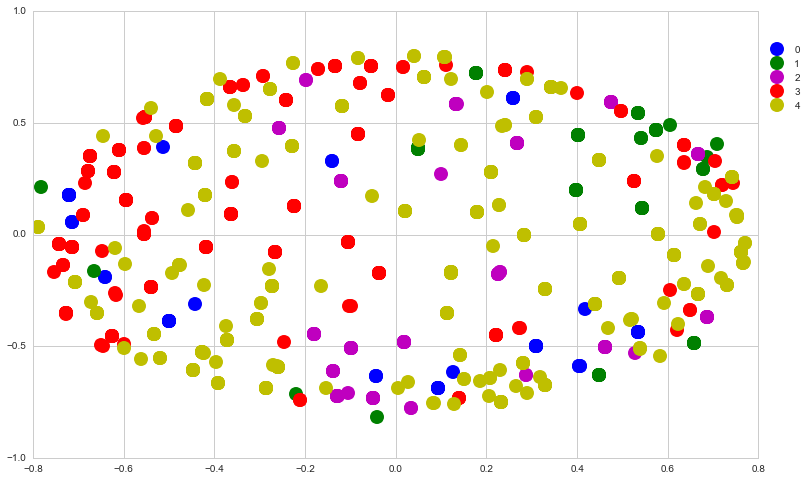

In [29]:
cluster_groups = goog.groupby('cluster')

cluster_colors = {0: 'b', 1: 'g', 2: 'm', 3: 'r', 4: 'y'}

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(13, 8))

#iterate through groups to layer the plot
for cluster_num, cluster_group in cluster_groups:
    ax.plot(\
    cluster_group.x, 
    cluster_group.y, 
    marker='o', 
    linestyle='', 
    ms=14, 
    label=cluster_num,
    #label=cluster_names[cluster_num], 
    color=cluster_colors[cluster_num], 
    mec='none')
    
    ax.set_aspect('auto')

ax.legend(numpoints=1,
         loc='center left',
         bbox_to_anchor=(1, 0.85))

#add film title
# for i in range(len(df)):
#     ax.text(df.ix[i]['x'] + 0.006, df.ix[i]['y'], df.ix[i]['title'], size=8)

plt.show()

### Hierarchical Document Clustering

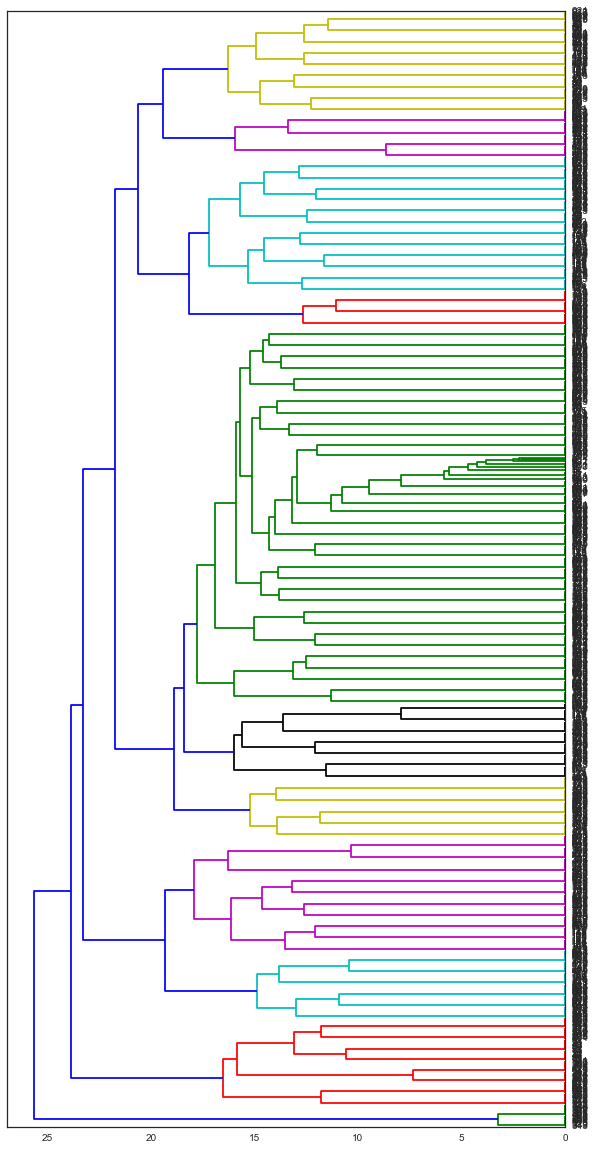

In [27]:
from scipy.cluster.hierarchy import ward, dendrogram

sns.set_style('white')

linkage_matrix = ward(dists)

fig, ax = plt.subplots(figsize=(10, 20))
ax = dendrogram(linkage_matrix, orientation="right")